# Problem (1.7)

## Problem statement

A particle with mass $m$ is in the state
$$ \Psi(x, t) = A e^{-a[(m x^2 / \hbar) + it]}, $$
where $A$ and $a$ are positive real constants.

1. Find $A$ 
2. For what potential energy function $V(x)$ does $\Psi$ satisfy the Schrodinger equation?
3. Calculate the expectation values of $x$, $x^2$, $p$ and $p^2$
4. Find $\sigma_x$ and $\sigma_p$. Is their product consistent with the uncertainty principle?

----

## Solution

In [30]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
sp.init_printing()

In [31]:
A, a = sp.symbols('A a', real=True, positive=True)
m, x, t = sp.symbols('m x t', real=True, positive = True)
V = sp.symbols('V')

psi = A*sp.exp(-a*((((m*x**2)/hbar))+ sp.I*t))

In [32]:
psi

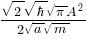

In [33]:
#Get probability density function 

psisq = sp.conjugate(psi)*psi

#must integrate to 1 from -oo to +oo

sp.integrate(psisq, (x, -sp.oo, sp.oo))

Now solve for $A$

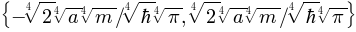

In [35]:
#integrand from above will be called int2
 
int2 = A**2*sp.exp(-(2*a*m*x**2)/hbar) #clearly the e terms cancel out above

sp.integrate(int2, (x, -sp.oo, sp.oo))
normalization_condiditon = sp.Eq(1, sp.integrate(int2, (x, -sp.oo, sp.oo)))
sp.solveset(normalization_condiditon, A)


Above is the solution for part 1

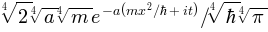

In [36]:
#replace A with our solution from 1

psi = psi.subs(A, next(iter(sp.solveset(normalization_condiditon, A))))
psi

looks good (kind of)

For part 2, we need to solve for $V(x)$ in the Schrodinger equation

In [37]:
#take the partial derivatives of $Psi$ that appear in the Schrodinger equation

DpsiDt = sp.diff(psi, t)
D2psiDx2 = sp.diff(sp.diff(psi,x), x)

#set up the Schrodinger Equation 
schroEq = sp.Eq(sp.I*hbar*DpsiDt, -((hbar**2)/(2*m)*D2psiDx2) + V*psi)

#solve for V
V = sp.solveset(schroEq, V)
V

Here is the potential $V(x)$, the solution for part 2

Now we need to get $\langle x \rangle$, $\langle x^2 \rangle$, $\langle p \rangle$, $\langle p^2 \rangle$

In [9]:
#expectation values of x, x^2 will be the integral of psi*psi times x or x^2 from x = -oo to +oo

psisq = psi*sp.conjugate(psi)

#expectation value of x...
expx = sp.integrate(x*psisq, (x, -sp.oo, sp.oo))
expx

so $\langle x \rangle = 0$

In [26]:
#expectation of x^2...
expx2 = sp.integrate((x**2)*psisq, (x, -sp.oo,sp.oo))
expx2

above is $\langle x^2 \rangle$

In [12]:
#expectation of p
#take the time derivative of the expectation of x
pexp = sp.diff(sp.integrate(int3, (x, -sp.oo, sp.oo)), t)
pexp

above is $\langle p \rangle$

Use equation 1.35 for $ \langle p^2 \rangle$
$$ \langle p^2 \rangle = \int_{-\infty}^{+\infty}\Psi^* (-\hbar^2 \frac{\partial^2}{\partial x^2}) \Psi dx,$$
the middle piece is the momentum operator $\frac{\hbar}{i} \frac{\partial}{\partial x}$ squared

In [20]:
#expectation of momentum squared

int4 = sp.conjugate(psi)*sp.diff(sp.diff(psi, x),x)
p2exp = -(hbar**2)*sp.integrate(int4, (x, -sp.oo, sp.oo))
p2exp

above is  $ \langle p^2 \rangle$

Lastly we can use the expectation values to calculate $\sigma_x$ and $\sigma_p$

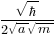

In [27]:
#standard deviation is the square root of expectation value of j^2 minus the expectation value of j squared
sigmax = sp.sqrt(expx2 - (expx**2))
sigmax

here is $\sigma_x$

In [21]:
#repeat the same thing with p expectation values
sigmap = sp.sqrt(p2exp-(pexp**2))
sigmap

above is  $ \sigma_p$

Check consistency with the unvertainty principle:
$$ \sigma_x\sigma_p \geq \frac{\hbar}{2}$$

In [28]:
#multiply the standard deviations 

sigmaProd  = sigmax*sigmap
sigmaProd

Looks good!

----

## Portfolio references
* Problem 1.3, 1.5
## Index terms
* uncertainty principle
* Schrodinger equation
* expectation value
* standard deviation
* momentum operator
## Book references
* eq 1.33 and 1.35 on pages 16 and 17
## External references